In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [2]:
import time
import os

from datetime import date
from datetime import timedelta
from datetime import datetime

import pickle

import json

import pandas as pd
import numpy as np
import random 


import pandas_ta as ta

import mplfinance as mpf 

In [3]:
from handle_data.read_data import load_candles

In [4]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

In [5]:
symbol = "BTC/USDT"
#symbol = "HNT/USDT"
symbol = "SOL/USDT"

timeframe='1d'
exchange='Binance'

experiment_nickname = "Noise_1d"

In [6]:
history_days = 50 * 30
history_days = 90

start_date = (date.today() - timedelta(days=history_days)).strftime('%Y-%m-%d')
end_date=None

if experiment_nickname == "Up_and_down":
    start_date = "2019-11-01"
    end_date="2022-01-23"
elif experiment_nickname == "LongTerm":
    start_date = "2017-01-01"
    end_date=None
elif experiment_nickname == "Up":
    start_date = "2023-01-01"
    end_date=None
elif experiment_nickname == "Bear":
    start_date = "2021-11-12"
    end_date="2022-11-12"
elif experiment_nickname == "Range":
    start_date = "2022-06-16"
    end_date="2023-03-10"
elif experiment_nickname == "HNT":
    start_date = "2023-06-16"
    end_date=None
elif experiment_nickname == "Noise":
    start_date = "2023-12-15"
    end_date= "2024-01-29"
elif experiment_nickname == "Noise_short":
    start_date = "2024-01-13"
    end_date= "2024-01-18"
elif experiment_nickname == "Noise_1d":
    start_date = "2023-03-18"
    end_date= "2023-06-20"

In [7]:
print("start_date:",start_date)
print("end_date:",end_date)

start_date: 2023-03-18
end_date: 2023-06-20


In [8]:
data = load_candles(exchange, symbol, timeframe=timeframe, start_date=start_date, end_date=end_date, )

reading /home/jovyan/work/data/SOL-USDT/1d/SOL-USDT_1d_Binance.pickle


In [9]:
#data

In [10]:
# https://github.com/matplotlib/mplfinance/blob/master/examples/addplot_legends.ipynb

#mpf.plot(data, type='candle', volume=True,) 

In [11]:
if timeframe=='1m':
    length = 7
    multiplier = 1
elif timeframe=='15m':
    length = 7
    multiplier = 1
elif timeframe=='1h':
    length = 7
    multiplier = 1
elif timeframe=='1d':
    length = 34
    multiplier = 2
    #length = 13
    #multiplier = 1
    length = 3
    multiplier = 2
elif timeframe=='1w':
    length = 9
    multiplier = 1

In [12]:
data["open_low_var"] = ((data["Open"] - data["Low"]) / data["Open"]) * 100

In [13]:
open_low_var = data["open_low_var"].mean()
open_low_var

3.235658

In [14]:
data["dema"] = ta.dema(close = data.Close, length=length)
data["stdev"] = ta.stdev(close = data.Close, length=length)

data["dema_low"] = ta.dema(close = data.Low, length=length)
data["stdev_low"] = ta.stdev(close = data.Low, length=length)


In [15]:
data["upper"] = data["dema"] + (multiplier * data["stdev"])
data["lower"] = data["dema"] - (multiplier * data["stdev"])

data["lower_low"] = data["dema_low"] - (multiplier * data["stdev_low"])

In [16]:
data["lower_open_low"] = data["lower"] - data["lower"] * ( open_low_var / 100 )

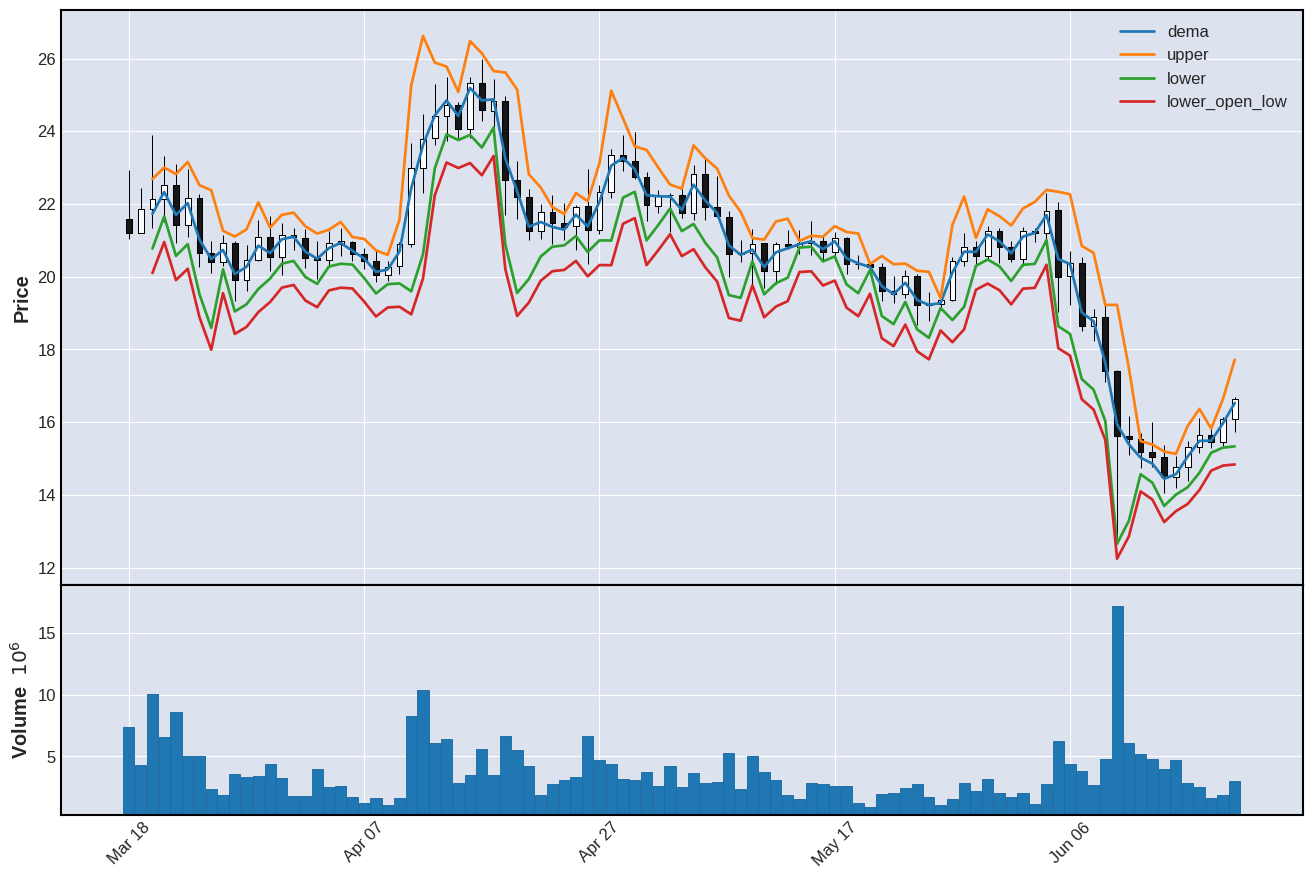

In [17]:
apdict = [mpf.make_addplot(data['dema'],label="dema"),
          mpf.make_addplot(data['upper'],label="upper"),
          mpf.make_addplot(data['lower'],label="lower"),
          #mpf.make_addplot(data['lower_low'],label="lower_low"),
          mpf.make_addplot(data['lower_open_low'],label="lower_open_low"),]

mpf.plot(data,type='candle', volume=True,addplot=apdict,figratio=(30,20),figscale=2)

In [18]:
mpf.plot(data,type='candle', volume=True,addplot=apdict,figratio=(30,20),figscale=2,savefig=f"_fast_view_{symbol.replace('/','-')}_{timeframe}_plot.png")

In [19]:
stop_loss = data["lower"][-1:].iloc[0]
#stop_price = data["lower_low"][-1:].iloc[0]
stop_price = data["lower_open_low"][-1:].iloc[0]

print(f"Fix stop loss at: {stop_loss} with stop price at: {stop_price} for {timeframe}")

Fix stop loss at: 15.334744146247658 with stop price at: 14.83856428117701 for 1d


In [20]:
%%script false --no-raise-error

excel_file_name = "_fast_view_sample_data.xlsx"

with pd.ExcelWriter(excel_file_name, engine='xlsxwriter') as writer:
    data.to_excel(writer, index=True)
    
csv_file_name = "_fast_view_sample_data.csv"
data.to_csv(csv_file_name)

In [21]:
#data